In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab as pl

In [2]:
train = pd.read_csv("train.csv")


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
 sum([True for idx,row in train.iterrows() if any(row.isnull())])

708

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['POE_C'] = np.where(train['Embarked']=='C', 1, 0)
train['POE_Q'] = np.where(train['Embarked']=='Q', 1, 0)
train['POE_S'] = np.where(train['Embarked']=='S', 1, 0)
train['Pclass1'] = np.where(train['Pclass']==1, 1, 0)
train['Pclass2'] = np.where(train['Pclass']==2, 1, 0)
train['Pclass3'] = np.where(train['Pclass']==3, 1, 0)
train['SexM'] = np.where(train['Sex']=='male', 1, 0)
train['SexF'] = np.where(train['Sex']=='female', 1, 0)
train['SibSp0-1'] = np.where(train['SibSp'] > 0, (np.where(train['SibSp'] <= 1, 1, 0)), 0)
train['SibSp1-2'] = np.where(train['SibSp'] > 1, (np.where(train['SibSp'] <= 2, 1, 0)), 0)
train['SibSp2-3'] = np.where(train['SibSp'] > 2, (np.where(train['SibSp'] <= 3, 1, 0)), 0)
train['SibSp3-4'] = np.where(train['SibSp'] > 3, (np.where(train['SibSp'] <= 4, 1, 0)), 0)
train['SibSp4-5'] = np.where(train['SibSp'] > 4, (np.where(train['SibSp'] <= 5, 1, 0)), 0)
train['SibSp5-6'] = np.where(train['SibSp'] > 5, (np.where(train['SibSp'] <= 6, 1, 0)), 0)
train['SibSp6-7'] = np.where(train['SibSp'] > 6, (np.where(train['SibSp'] <= 7, 1, 0)), 0)
train['SibSp7-8'] = np.where(train['SibSp'] > 7, (np.where(train['SibSp'] <= 8, 1, 0)), 0)
train['Parch0-1'] = np.where(train['Parch'] > 0, (np.where(train['Parch'] <= 1, 1, 0)), 0)
train['Parch1-2'] = np.where(train['Parch'] > 1, (np.where(train['Parch'] <= 2, 1, 0)), 0)
train['Parch2-3'] = np.where(train['Parch'] > 2, (np.where(train['Parch'] <= 3, 1, 0)), 0)
train['Parch3-4'] = np.where(train['Parch'] > 3, (np.where(train['Parch'] <= 4, 1, 0)), 0)
train['Parch4-5'] = np.where(train['Parch'] > 4, (np.where(train['Parch'] <= 5, 1, 0)), 0)
train['Parch5-6'] = np.where(train['Parch'] > 5, (np.where(train['Parch'] <= 6, 1, 0)), 0)
train['Age0-10'] = np.where(train['Age'] > 0, (np.where(train['Age'] <= 10, 1, 0)), 0)
train['Age10-20'] = np.where(train['Age'] > 10, (np.where(train['Age'] <= 20, 1, 0)), 0)
train['Age20-30'] = np.where(train['Age'] > 20, (np.where(train['Age'] <= 30, 1, 0)), 0)
train['Age30-40'] = np.where(train['Age'] > 30, (np.where(train['Age'] <= 40, 1, 0)), 0)
train['Age40-50'] = np.where(train['Age'] > 40, (np.where(train['Age'] <= 50, 1, 0)), 0)
train['Age50-60'] = np.where(train['Age'] > 50, (np.where(train['Age'] <= 60, 1, 0)), 0)
train['Age60-70'] = np.where(train['Age'] > 60, (np.where(train['Age'] <= 60, 1, 0)), 0)
train['Age70-80'] = np.where(train['Age'] > 70, (np.where(train['Age'] <= 80, 1, 0)), 0)
train['Fare0-1'] = np.where(train['Fare'] > 0, (np.where(train['Fare'] <= 1, 1, 0)), 0)
train['Fare1-2'] = np.where(train['Fare'] > 1, (np.where(train['Fare'] <= 2, 1, 0)), 0)
train['Fare2-3'] = np.where(train['Fare'] > 2, (np.where(train['Fare'] <= 3, 1, 0)), 0)
train['Fare3-4'] = np.where(train['Fare'] > 3, (np.where(train['Fare'] <= 4, 1, 0)), 0)
train['Fare4-5'] = np.where(train['Fare'] > 4, (np.where(train['Fare'] <= 5, 1, 0)), 0)
train['Fare5-6'] = np.where(train['Fare'] > 5, (np.where(train['Fare'] <= 6, 1, 0)), 0)
train['Fare6-7'] = np.where(train['Fare'] > 6, (np.where(train['Fare'] <= 7, 1, 0)), 0)
train['Fare7-8'] = np.where(train['Fare'] > 7, (np.where(train['Fare'] <= 8, 1, 0)), 0)
train['Fare8-9'] = np.where(train['Fare'] > 8, (np.where(train['Fare'] <= 9, 1, 0)), 0)
train['Fare9-10'] = np.where(train['Fare'] > 9, (np.where(train['Fare'] <= 10, 1, 0)), 0)
train['Fare10-11'] = np.where(train['Fare'] > 10, (np.where(train['Fare'] <= 11, 1, 0)), 0)
train['Fare11-12'] = np.where(train['Fare'] > 11, (np.where(train['Fare'] <= 12, 1, 0)), 0)
train['Fare12-13'] = np.where(train['Fare'] > 12, (np.where(train['Fare'] <= 13, 1, 0)), 0)
train['Fare13-14'] = np.where(train['Fare'] > 13, (np.where(train['Fare'] <= 14, 1, 0)), 0)
train['Fare14-15'] = np.where(train['Fare'] > 14, (np.where(train['Fare'] <= 15, 1, 0)), 0)
train['Fare15-16'] = np.where(train['Fare'] > 15, (np.where(train['Fare'] <= 16, 1, 0)), 0)
train['Fare16-17'] = np.where(train['Fare'] > 16, (np.where(train['Fare'] <= 17, 1, 0)), 0)
train['Fare17-18'] = np.where(train['Fare'] > 17, (np.where(train['Fare'] <= 18, 1, 0)), 0)
train['Fare18-19'] = np.where(train['Fare'] > 18, (np.where(train['Fare'] <= 19, 1, 0)), 0)
train['Fare19-20'] = np.where(train['Fare'] > 19, (np.where(train['Fare'] <= 20, 1, 0)), 0)
train['Fare20-25'] = np.where(train['Fare'] > 20, (np.where(train['Fare'] <= 25, 1, 0)), 0)
train['Fare25-30'] = np.where(train['Fare'] > 25, (np.where(train['Fare'] <= 30, 1, 0)), 0)
train['Fare30-35'] = np.where(train['Fare'] > 30, (np.where(train['Fare'] <= 35, 1, 0)), 0)
train['Fare35-40'] = np.where(train['Fare'] > 35, (np.where(train['Fare'] <= 40, 1, 0)), 0)
train['Fare40-45'] = np.where(train['Fare'] > 40, (np.where(train['Fare'] <= 45, 1, 0)), 0)
train['Fare45-50'] = np.where(train['Fare'] > 45, (np.where(train['Fare'] <= 50, 1, 0)), 0)
train['Fare50-60'] = np.where(train['Fare'] > 50, (np.where(train['Fare'] <= 60, 1, 0)), 0)
train['Fare60-70'] = np.where(train['Fare'] > 60, (np.where(train['Fare'] <= 70, 1, 0)), 0)
train['Fare70-80'] = np.where(train['Fare'] > 70, (np.where(train['Fare'] <= 80, 1, 0)), 0)
train['Fare80-90'] = np.where(train['Fare'] > 80, (np.where(train['Fare'] <= 90, 1, 0)), 0)
train['Fare90-100'] = np.where(train['Fare'] > 90, (np.where(train['Fare'] <= 100, 1, 0)), 0)
train['Fare100-150'] = np.where(train['Fare'] > 100, (np.where(train['Fare'] <= 150, 1, 0)), 0)
train['Fare150-200'] = np.where(train['Fare'] > 150, (np.where(train['Fare'] <= 200, 1, 0)), 0)
train['Fare200-250'] = np.where(train['Fare'] > 200, (np.where(train['Fare'] <= 250, 1, 0)), 0)
train['Fare250-300'] = np.where(train['Fare'] > 250, (np.where(train['Fare'] <= 300, 1, 0)), 0)
train['Fare300-350'] = np.where(train['Fare'] > 300, (np.where(train['Fare'] <= 350, 1, 0)), 0)
train['Fare350-400'] = np.where(train['Fare'] > 350, (np.where(train['Fare'] <= 400, 1, 0)), 0)
train['Fare400-450'] = np.where(train['Fare'] > 400, (np.where(train['Fare'] <= 450, 1, 0)), 0)
train['Fare450-500'] = np.where(train['Fare'] > 450, (np.where(train['Fare'] <= 500, 1, 0)), 0)
train['Fare500-550'] = np.where(train['Fare'] > 500, (np.where(train['Fare'] <= 550, 1, 0)), 0)
train['Fare550-600'] = np.where(train['Fare'] > 550, (np.where(train['Fare'] <= 600, 1, 0)), 0)

In [8]:
pd.set_option('display.max_columns', 83)


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,POE_C,POE_Q,POE_S,Pclass1,Pclass2,Pclass3,SexM,SexF,SibSp0-1,SibSp1-2,SibSp2-3,SibSp3-4,SibSp4-5,SibSp5-6,SibSp6-7,SibSp7-8,Parch0-1,Parch1-2,Parch2-3,Parch3-4,Parch4-5,Parch5-6,Age0-10,Age10-20,Age20-30,Age30-40,Age40-50,Age50-60,Age60-70,Age70-80,Fare0-1,Fare1-2,Fare2-3,Fare3-4,Fare4-5,Fare5-6,Fare6-7,Fare7-8,Fare8-9,Fare9-10,Fare10-11,Fare11-12,Fare12-13,Fare13-14,Fare14-15,Fare15-16,Fare16-17,Fare17-18,Fare18-19,Fare19-20,Fare20-25,Fare25-30,Fare30-35,Fare35-40,Fare40-45,Fare45-50,Fare50-60,Fare60-70,Fare70-80,Fare80-90,Fare90-100,Fare100-150,Fare150-200,Fare200-250,Fare250-300,Fare300-350,Fare350-400,Fare400-450,Fare450-500,Fare500-550,Fare550-600
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,POE_C,POE_Q,POE_S,Pclass1,Pclass2,Pclass3,SexM,SexF,SibSp0-1,SibSp1-2,SibSp2-3,SibSp3-4,SibSp4-5,SibSp5-6,SibSp6-7,SibSp7-8,Parch0-1,Parch1-2,Parch2-3,Parch3-4,Parch4-5,Parch5-6,Age0-10,Age10-20,Age20-30,Age30-40,Age40-50,Age50-60,Age60-70,Age70-80,Fare0-1,Fare1-2,Fare2-3,Fare3-4,Fare4-5,Fare5-6,Fare6-7,Fare7-8,Fare8-9,Fare9-10,Fare10-11,Fare11-12,Fare12-13,Fare13-14,Fare14-15,Fare15-16,Fare16-17,Fare17-18,Fare18-19,Fare19-20,Fare20-25,Fare25-30,Fare30-35,Fare35-40,Fare40-45,Fare45-50,Fare50-60,Fare60-70,Fare70-80,Fare80-90,Fare90-100,Fare100-150,Fare150-200,Fare200-250,Fare250-300,Fare300-350,Fare350-400,Fare400-450,Fare450-500,Fare500-550,Fare550-600
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.0,891.0,891.0,891.0,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.0,891.0,891.0,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066,0.647587,0.352413,0.234568,0.031425,0.017957,0.020202,0.005612,0.0,0.0,0.007856,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.071829,0.129068,0.258137,0.173962,0.096521,0.047138,0.0,0.005612,0.0,0.0,0.0,0.0,0.002245,0.0,0.012346,0.239057,0.080808,0.025814,0.031425,0.011223,0.060606,0.010101,0.023569,0.030303,0.012346,0.006734,0.005612,0.008979,0.047138,0.112233,0.040404,0.024691,0.005612,0.012346,0.042649,0.019080,0.034792,0.019080,0.004489,0.026936,0.010101,0.012346,0.006734,0.0,0.0,0.0,0.0,0.003367,0.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665,0.477990,0.477990,0.423966,0.174562,0.132871,0.140770,0.074743,0.0,0.0,0.088337,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.258350,0.335464,0.437855,0.379290,0.295470,0.212053,0.0,0.074743,0.0,0.0,0.0,0.0,0.047351,0.0,0.110485,0.426747,0.272693,0.158668,0.174562,0.105403,0.238740,0.100051,0.151787,0.171516,0.110485,0.081830,0.074743,0.094383,0.212053,0.315831,0.197016,0.155270,0.074743,0.110485,0.202177,0.136882,0.183356,0.136882,0.066890,0.161987,0.100051,0.110485,0.081830,0.0,0.0,0.0,0.0,0.057961,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [11]:
train['Survived'] = train['Survived'].astype(object)
train['Pclass'] = train['Pclass'].astype(object)
train['POE_C'] = train['POE_C'].astype(object)
train['POE_Q'] = train['POE_Q'].astype(object)
train['POE_S'] = train['POE_S'].astype(object)
train['Sex'] = train['Sex'].astype(object)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 83 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
POE_C          891 non-null object
POE_Q          891 non-null object
POE_S          891 non-null object
Pclass1        891 non-null int64
Pclass2        891 non-null int64
Pclass3        891 non-null int64
SexM           891 non-null int64
SexF           891 non-null int64
SibSp0-1       891 non-null int64
SibSp1-2       891 non-null int64
SibSp2-3       891 non-null int64
SibSp3-4       891 non-null int64
SibSp4-5       891 non-null int64
SibSp5-6       891 non-null int

In [13]:
train['Pclass'].describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

In [14]:
print(pd.crosstab(train['Survived'], train['Pclass'], rownames=['Survived']))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


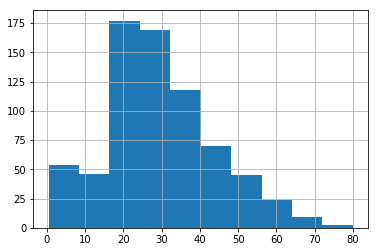

In [15]:
train['Age'].hist()

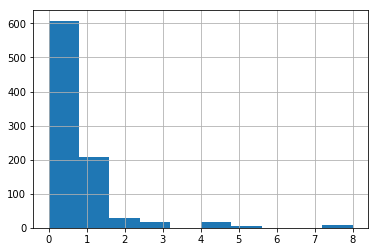

In [16]:
train['SibSp'].hist()

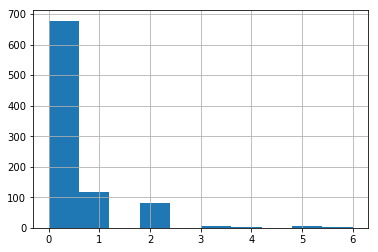

In [17]:
train['Parch'].hist()

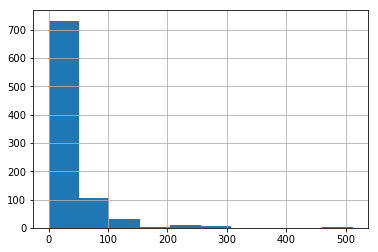

In [18]:
train['Fare'].hist()

(array([ 562.,  170.,   67.,   39.,   15.,   16.,    2.,    0.,    9.,
           2.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    3.]),
 array([   0.     ,   25.61646,   51.23292,   76.84938,  102.46584,
         128.0823 ,  153.69876,  179.31522,  204.93168,  230.54814,
         256.1646 ,  281.78106,  307.39752,  333.01398,  358.63044,
         384.2469 ,  409.86336,  435.47982,  461.09628,  486.71274,
         512.3292 ]),
 <a list of 20 Patch objects>)

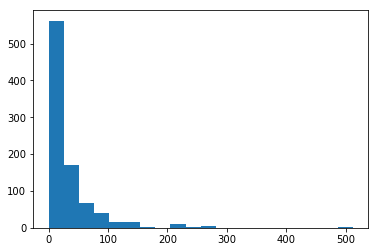

In [19]:
plt.hist(train['Fare'], bins=20)

(array([  15.,    0.,    0.,    0.,    1.,    1.,   11.,  213.,   70.,
          25.,   28.,    9.,   13.,   50.,   21.,   27.,   12.,    3.,
           8.,    8.,    9.,   11.,    4.,    8.,   10.,    8.,   57.,
          17.,    2.,   10.,   15.,   14.,    2.,    4.,    6.,    5.,
           2.,    2.,    1.,   13.,    1.,    3.,    1.,    0.,    0.,
           0.,    6.,    1.,    0.,    3.,    2.,    3.,   10.,    5.,
           0.,    5.,    9.,    4.,    0.,    1.,    0.,    3.,    0.,
           1.,    0.,    2.,    2.,    0.,    0.,    9.,    0.,    3.,
           0.,    5.,    0.,    1.,    4.,    5.,    4.,    7.,    2.,
           1.,    2.,    5.,    0.,    0.,    3.,    0.,    0.,    2.,
           4.,    2.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,
           2.,    0.,    4.,    0.,    0.,    3.,    0.,    0.,    0.,
           0.,    0.,    0.,    4.,    0.,    0.,    0.,    0.,    0.,
      

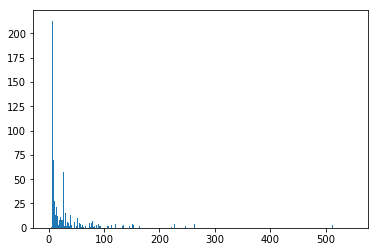

In [20]:
plt.hist(train['Fare'], bins=range(0, 550))

(array([  15.,    0.,    0.,    0.,    1.,    1.,   11.,  213.,   70.,
          25.,   28.,    9.,   13.,   50.,   21.,   27.,   12.,    3.,
           8.,    8.,    9.,   11.,    4.,    8.,   10.,    8.,   57.,
          17.,    2.,   10.,   15.,   14.,    2.,    4.,    6.,    5.,
           2.,    2.,    1.,   13.,    1.,    3.,    1.,    0.,    0.,
           0.,    6.,    1.,    0.,    3.,    2.,    3.,   10.,    5.,
           0.,    5.,    9.,    4.,    0.,    1.,    0.,    3.,    0.,
           1.,    0.,    2.,    2.,    0.,    0.,    9.,    0.,    3.,
           0.,    5.,    0.,    1.,    4.,    5.,    4.,    7.,    2.,
           1.,    2.,    5.,    0.,    0.,    3.,    0.,    0.,    2.,
           4.,    2.,    0.,    2.,    0.,    0.,    0.,    0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4

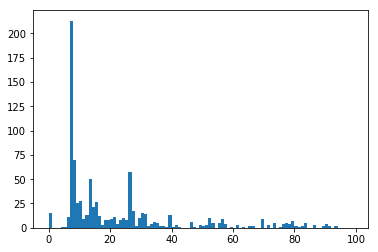

In [21]:
plt.hist(train['Fare'], bins=range(0, 100))

In [22]:
train = train.set_index(['PassengerId'])

In [23]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'POE_C', 'POE_Q', 'POE_S', 'Pclass1',
       'Pclass2', 'Pclass3', 'SexM', 'SexF', 'SibSp0-1', 'SibSp1-2',
       'SibSp2-3', 'SibSp3-4', 'SibSp4-5', 'SibSp5-6', 'SibSp6-7', 'SibSp7-8',
       'Parch0-1', 'Parch1-2', 'Parch2-3', 'Parch3-4', 'Parch4-5', 'Parch5-6',
       'Age0-10', 'Age10-20', 'Age20-30', 'Age30-40', 'Age40-50', 'Age50-60',
       'Age60-70', 'Age70-80', 'Fare0-1', 'Fare1-2', 'Fare2-3', 'Fare3-4',
       'Fare4-5', 'Fare5-6', 'Fare6-7', 'Fare7-8', 'Fare8-9', 'Fare9-10',
       'Fare10-11', 'Fare11-12', 'Fare12-13', 'Fare13-14', 'Fare14-15',
       'Fare15-16', 'Fare16-17', 'Fare17-18', 'Fare18-19', 'Fare19-20',
       'Fare20-25', 'Fare25-30', 'Fare30-35', 'Fare35-40', 'Fare40-45',
       'Fare45-50', 'Fare50-60', 'Fare60-70', 'Fare70-80', 'Fare80-90',
       'Fare90-100', 'Fare100-150', 'Fare150-200', 'Fare200-250',
       'Fare250-300', 'Fare300-350', 'F

In [24]:
nn_train = train.drop(train.columns[1:11], axis=1)
nn_train = nn_train.drop(nn_train.columns[7], axis=1)

In [25]:
nn_train.head()

,Survived,POE_C,POE_Q,POE_S,Pclass1,Pclass2,Pclass3,SexF,SibSp0-1,SibSp1-2,SibSp2-3,SibSp3-4,SibSp4-5,SibSp5-6,SibSp6-7,SibSp7-8,Parch0-1,Parch1-2,Parch2-3,Parch3-4,Parch4-5,Parch5-6,Age0-10,Age10-20,Age20-30,Age30-40,Age40-50,Age50-60,Age60-70,Age70-80,Fare0-1,Fare1-2,Fare2-3,Fare3-4,Fare4-5,Fare5-6,Fare6-7,Fare7-8,Fare8-9,Fare9-10,Fare10-11,Fare11-12,Fare12-13,Fare13-14,Fare14-15,Fare15-16,Fare16-17,Fare17-18,Fare18-19,Fare19-20,Fare20-25,Fare25-30,Fare30-35,Fare35-40,Fare40-45,Fare45-50,Fare50-60,Fare60-70,Fare70-80,Fare80-90,Fare90-100,Fare100-150,Fare150-200,Fare200-250,Fare250-300,Fare300-350,Fare350-400,Fare400-450,Fare450-500,Fare500-550,Fare550-600
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
nn_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 71 columns):
Survived       891 non-null object
POE_C          891 non-null object
POE_Q          891 non-null object
POE_S          891 non-null object
Pclass1        891 non-null int64
Pclass2        891 non-null int64
Pclass3        891 non-null int64
SexF           891 non-null int64
SibSp0-1       891 non-null int64
SibSp1-2       891 non-null int64
SibSp2-3       891 non-null int64
SibSp3-4       891 non-null int64
SibSp4-5       891 non-null int64
SibSp5-6       891 non-null int64
SibSp6-7       891 non-null int64
SibSp7-8       891 non-null int64
Parch0-1       891 non-null int64
Parch1-2       891 non-null int64
Parch2-3       891 non-null int64
Parch3-4       891 non-null int64
Parch4-5       891 non-null int64
Parch5-6       891 non-null int64
Age0-10        891 non-null int64
Age10-20       891 non-null int64
Age20-30       891 non-null int64
Age30-40       891 non-null int64
Age40-5

In [27]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import h5py
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [28]:
nn_train.to_csv("Titanic_binary.txt", sep=',', header=True)

In [50]:
dataset = numpy.loadtxt("Titanic_binary.txt", delimiter=',', skiprows=1)

In [52]:
X = dataset[:,2:]
Y = dataset[:,1]

In [59]:
model = Sequential()
model.add(Dense(96, input_dim=70, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
model.fit(X, Y, epochs=300, batch_size=10, validation_split=0.15)

Train on 757 samples, validate on 134 samples
Epoch 1/300
757/757 [==============================] - 0s - loss: 0.5875 - acc: 0.6962 - val_loss: 0.4770 - val_acc: 0.8060
Epoch 2/300
757/757 [==============================] - 0s - loss: 0.4554 - acc: 0.8151 - val_loss: 0.4366 - val_acc: 0.8060
Epoch 3/300
757/757 [==============================] - 0s - loss: 0.4103 - acc: 0.8283 - val_loss: 0.4346 - val_acc: 0.7836
Epoch 4/300
757/757 [==============================] - ETA: 0s - loss: 0.3825 - acc: 0.847 - 0s - loss: 0.3845 - acc: 0.8454 - val_loss: 0.4315 - val_acc: 0.7985
Epoch 5/300
757/757 [==============================] - 0s - loss: 0.3698 - acc: 0.8587 - val_loss: 0.4407 - val_acc: 0.7985
Epoch 6/300
757/757 [==============================] - 0s - loss: 0.3481 - acc: 0.8653 - val_loss: 0.4414 - val_acc: 0.8060
Epoch 7/300
757/757 [==============================] - 0s - loss: 0.3356 - acc: 0.8732 - val_loss: 0.4599 - val_acc: 0.7985
Epoch 8/300
757/757 [===========================

In [62]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/891 [>.............................] - ETA: 0s
acc: 91.02%


In [63]:
# serialize model to JSON
print("* Saving model to disk..")
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

* Saving model to disk..


In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import pandas

In [69]:
#load data
test = pandas.read_csv("test.csv")

test['POE_C'] = np.where(test['Embarked']=='C', 1, 0)
test['POE_Q'] = np.where(test['Embarked']=='Q', 1, 0)
test['POE_S'] = np.where(test['Embarked']=='S', 1, 0)
test['Pclass1'] = np.where(test['Pclass']==1, 1, 0)
test['Pclass2'] = np.where(test['Pclass']==2, 1, 0)
test['Pclass3'] = np.where(test['Pclass']==3, 1, 0)
test['SexM'] = np.where(test['Sex']=='male', 1, 0)
test['SexF'] = np.where(test['Sex']=='female', 1, 0)
test['SibSp0-1'] = np.where(test['SibSp'] > 0, (np.where(test['SibSp'] <= 1, 1, 0)), 0)
test['SibSp1-2'] = np.where(test['SibSp'] > 1, (np.where(test['SibSp'] <= 2, 1, 0)), 0)
test['SibSp2-3'] = np.where(test['SibSp'] > 2, (np.where(test['SibSp'] <= 3, 1, 0)), 0)
test['SibSp3-4'] = np.where(test['SibSp'] > 3, (np.where(test['SibSp'] <= 4, 1, 0)), 0)
test['SibSp4-5'] = np.where(test['SibSp'] > 4, (np.where(test['SibSp'] <= 5, 1, 0)), 0)
test['SibSp5-6'] = np.where(test['SibSp'] > 5, (np.where(test['SibSp'] <= 6, 1, 0)), 0)
test['SibSp6-7'] = np.where(test['SibSp'] > 6, (np.where(test['SibSp'] <= 7, 1, 0)), 0)
test['SibSp7-8'] = np.where(test['SibSp'] > 7, (np.where(test['SibSp'] <= 8, 1, 0)), 0)
test['Parch0-1'] = np.where(test['Parch'] > 0, (np.where(test['Parch'] <= 1, 1, 0)), 0)
test['Parch1-2'] = np.where(test['Parch'] > 1, (np.where(test['Parch'] <= 2, 1, 0)), 0)
test['Parch2-3'] = np.where(test['Parch'] > 2, (np.where(test['Parch'] <= 3, 1, 0)), 0)
test['Parch3-4'] = np.where(test['Parch'] > 3, (np.where(test['Parch'] <= 4, 1, 0)), 0)
test['Parch4-5'] = np.where(test['Parch'] > 4, (np.where(test['Parch'] <= 5, 1, 0)), 0)
test['Parch5-6'] = np.where(test['Parch'] > 5, (np.where(test['Parch'] <= 6, 1, 0)), 0)
test['Age0-10'] = np.where(test['Age'] > 0, (np.where(test['Age'] <= 10, 1, 0)), 0)
test['Age10-20'] = np.where(test['Age'] > 10, (np.where(test['Age'] <= 20, 1, 0)), 0)
test['Age20-30'] = np.where(test['Age'] > 20, (np.where(test['Age'] <= 30, 1, 0)), 0)
test['Age30-40'] = np.where(test['Age'] > 30, (np.where(test['Age'] <= 40, 1, 0)), 0)
test['Age40-50'] = np.where(test['Age'] > 40, (np.where(test['Age'] <= 50, 1, 0)), 0)
test['Age50-60'] = np.where(test['Age'] > 50, (np.where(test['Age'] <= 60, 1, 0)), 0)
test['Age60-70'] = np.where(test['Age'] > 60, (np.where(test['Age'] <= 60, 1, 0)), 0)
test['Age70-80'] = np.where(test['Age'] > 70, (np.where(test['Age'] <= 80, 1, 0)), 0)
test['Fare0-1'] = np.where(test['Fare'] > 0, (np.where(test['Fare'] <= 1, 1, 0)), 0)
test['Fare1-2'] = np.where(test['Fare'] > 1, (np.where(test['Fare'] <= 2, 1, 0)), 0)
test['Fare2-3'] = np.where(test['Fare'] > 2, (np.where(test['Fare'] <= 3, 1, 0)), 0)
test['Fare3-4'] = np.where(test['Fare'] > 3, (np.where(test['Fare'] <= 4, 1, 0)), 0)
test['Fare4-5'] = np.where(test['Fare'] > 4, (np.where(test['Fare'] <= 5, 1, 0)), 0)
test['Fare5-6'] = np.where(test['Fare'] > 5, (np.where(test['Fare'] <= 6, 1, 0)), 0)
test['Fare6-7'] = np.where(test['Fare'] > 6, (np.where(test['Fare'] <= 7, 1, 0)), 0)
test['Fare7-8'] = np.where(test['Fare'] > 7, (np.where(test['Fare'] <= 8, 1, 0)), 0)
test['Fare8-9'] = np.where(test['Fare'] > 8, (np.where(test['Fare'] <= 9, 1, 0)), 0)
test['Fare9-10'] = np.where(test['Fare'] > 9, (np.where(test['Fare'] <= 10, 1, 0)), 0)
test['Fare10-11'] = np.where(test['Fare'] > 10, (np.where(test['Fare'] <= 11, 1, 0)), 0)
test['Fare11-12'] = np.where(test['Fare'] > 11, (np.where(test['Fare'] <= 12, 1, 0)), 0)
test['Fare12-13'] = np.where(test['Fare'] > 12, (np.where(test['Fare'] <= 13, 1, 0)), 0)
test['Fare13-14'] = np.where(test['Fare'] > 13, (np.where(test['Fare'] <= 14, 1, 0)), 0)
test['Fare14-15'] = np.where(test['Fare'] > 14, (np.where(test['Fare'] <= 15, 1, 0)), 0)
test['Fare15-16'] = np.where(test['Fare'] > 15, (np.where(test['Fare'] <= 16, 1, 0)), 0)
test['Fare16-17'] = np.where(test['Fare'] > 16, (np.where(test['Fare'] <= 17, 1, 0)), 0)
test['Fare17-18'] = np.where(test['Fare'] > 17, (np.where(test['Fare'] <= 18, 1, 0)), 0)
test['Fare18-19'] = np.where(test['Fare'] > 18, (np.where(test['Fare'] <= 19, 1, 0)), 0)
test['Fare19-20'] = np.where(test['Fare'] > 19, (np.where(test['Fare'] <= 20, 1, 0)), 0)
test['Fare20-25'] = np.where(test['Fare'] > 20, (np.where(test['Fare'] <= 25, 1, 0)), 0)
test['Fare25-30'] = np.where(test['Fare'] > 25, (np.where(test['Fare'] <= 30, 1, 0)), 0)
test['Fare30-35'] = np.where(test['Fare'] > 30, (np.where(test['Fare'] <= 35, 1, 0)), 0)
test['Fare35-40'] = np.where(test['Fare'] > 35, (np.where(test['Fare'] <= 40, 1, 0)), 0)
test['Fare40-45'] = np.where(test['Fare'] > 40, (np.where(test['Fare'] <= 45, 1, 0)), 0)
test['Fare45-50'] = np.where(test['Fare'] > 45, (np.where(test['Fare'] <= 50, 1, 0)), 0)
test['Fare50-60'] = np.where(test['Fare'] > 50, (np.where(test['Fare'] <= 60, 1, 0)), 0)
test['Fare60-70'] = np.where(test['Fare'] > 60, (np.where(test['Fare'] <= 70, 1, 0)), 0)
test['Fare70-80'] = np.where(test['Fare'] > 70, (np.where(test['Fare'] <= 80, 1, 0)), 0)
test['Fare80-90'] = np.where(test['Fare'] > 80, (np.where(test['Fare'] <= 90, 1, 0)), 0)
test['Fare90-100'] = np.where(test['Fare'] > 90, (np.where(test['Fare'] <= 100, 1, 0)), 0)
test['Fare100-150'] = np.where(test['Fare'] > 100, (np.where(test['Fare'] <= 150, 1, 0)), 0)
test['Fare150-200'] = np.where(test['Fare'] > 150, (np.where(test['Fare'] <= 200, 1, 0)), 0)
test['Fare200-250'] = np.where(test['Fare'] > 200, (np.where(test['Fare'] <= 250, 1, 0)), 0)
test['Fare250-300'] = np.where(test['Fare'] > 250, (np.where(test['Fare'] <= 300, 1, 0)), 0)
test['Fare300-350'] = np.where(test['Fare'] > 300, (np.where(test['Fare'] <= 350, 1, 0)), 0)
test['Fare350-400'] = np.where(test['Fare'] > 350, (np.where(test['Fare'] <= 400, 1, 0)), 0)
test['Fare400-450'] = np.where(test['Fare'] > 400, (np.where(test['Fare'] <= 450, 1, 0)), 0)
test['Fare450-500'] = np.where(test['Fare'] > 450, (np.where(test['Fare'] <= 500, 1, 0)), 0)
test['Fare500-550'] = np.where(test['Fare'] > 500, (np.where(test['Fare'] <= 550, 1, 0)), 0)
test['Fare550-600'] = np.where(test['Fare'] > 550, (np.where(test['Fare'] <= 600, 1, 0)), 0)



In [72]:
nn_test = test.drop(test.columns[1:11], axis=1)
nn_test = nn_test.drop(nn_test.columns[7], axis=1)
nn_test.to_csv("Titanic_binary_test.csv", sep=',', header=True)
dataset = numpy.loadtxt("Titanic_binary.txt", delimiter=',', skiprows=1)

In [73]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))